In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import struct
import scipy.misc as smisc

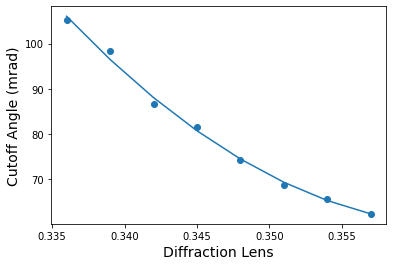

           2
6.124e+04 x - 4.453e+04 x + 8153


In [23]:
x = [0.336,0.339,0.342,0.345,0.348,0.351,0.354,0.357]
y = [105.29,98.31,86.60,81.46,74.25,68.72,65.46,62.33]

mymodel = np.poly1d(np.polyfit(x, y, 2))

plt.scatter(x, y)
plt.plot(x, mymodel(x))
plt.xlabel('Diffraction Lens',fontsize=14)
plt.ylabel('Cutoff Angle (mrad)',fontsize=14)
plt.show()
print(mymodel)

In [16]:
from sympy.solvers import solve
from sympy import Symbol

In [20]:
mymodel

poly1d([ 965207.63182948, -942089.94704376,  303046.39248053,
        -31972.87999819])

In [24]:
x = Symbol('x')
solve(61240*x**2-44530*x+8153-350,x)

[-sqrt(17874505)/61240 + 4453/12248, sqrt(17874505)/61240 + 4453/12248]

In [12]:
filelist = glob.glob('D:/2020/TitanCalibration/072320/InnerCollectionAngle/*')
frame = np.zeros(2048)
for i in range(len(filelist)):
    frame = frame + loadMRCfile(filelist[i])

C:\Users\Chenyu\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  


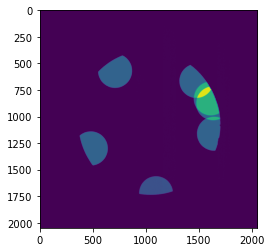

In [14]:
plt.imshow(frame)
smisc.imsave('D:/2020/TitanCalibration/072320/InnerCollectionAngle/Accumulated_apt30.tiff',frame)

In [3]:
def loadMRCfile(filepath):
    with open(filepath, mode='rb') as file: # b is important -> binary
        file.seek(0)
        read_bytes = file.read(8)
        frame_width = struct.unpack('<i',read_bytes[0:4])
        frame_width = frame_width[0]
        frame_height = struct.unpack('<i',read_bytes[4:8])
        frame_height = frame_height[0]
        image = np.zeros((frame_height,frame_width))
        file.seek(256*4)
        dataset = file.read(frame_width*frame_height*4)
        for irow in range(frame_height):
            for icol in range(frame_width):
                pixel = struct.unpack('<f',dataset[(irow*frame_width+icol)*4:(irow*frame_width+icol+1)*4])[0]
                image[irow,icol] = pixel
        return image